<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

Modelo pre-entrenado

In [3]:
inception = models.inception_v3(pretrained=True)


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 104M/104M [00:00<00:00, 184MB/s] 


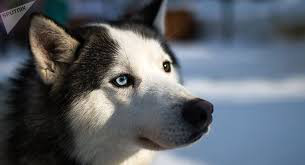

In [7]:
url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMVFhUVFhUVFRUVFhUVFRUVFRUWFhUVFRcYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OFRAQFysdFx0tLS0tLS0tLSstLS0tLSsrKy0rLS0tLS0tLS0rLS0tLS0tLS0tLS0rLS0rLSstLS0tLf/AABEIAKUBMQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAAIDBAYBBwj/xAA7EAABAwIEAwYFAwIGAgMAAAABAAIRAyEEBTFBElFhBhMicYGRFDKhwfCx0eEHQhUjUmKS8TNyFlNz/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIBEBAQACAwEAAwEBAAAAAAAAAAECEQMSITETMkEiBP/aAAwDAQACEQMRAD8A81ZThNe7YLR08tptHjdxGAYbYQepuRF7DYp1XCkSKbO7sbjyHDLzfXiBGvkjKLyjPUsuqOguhgtd5jeLDXcI3hcuo02d49xcIBv4RfTw6z0XX4BslzjaXE+Rn5idYBcPKOSBZnmQdZtqbflHPrH6DZEQlxmK4zIAaP7WiwA/fqqLyoGYkn+0wnudsbFVLNp5N9XWhSNqEJjE/hWunBaMZfVlF6bJCz+CdCL0sSAFcsdHHvSf4cSpBhwqvxYTvjQtJcVWVLiMOIVQ0lO/FghRNfKLqka0woa9dOquAuhWOxAG6zzujxm0tSvK7TqgaoY2vOihxFR2iw7NuulvHZtYgaoI95cfNJ6v9ncF3tZo2Fyp3sfG7yDA9zhpi5F1AQEVzir3eHELHjMSneSY+HOPt60DHBWqUFZJ2ZOVrC5uUY80tF4tRrWUAVIaQCFYLHyiTay68MtxzZx11IckNx+FCJh6q4wqqmSgzcKJRjBYeyogolhH2UTQ9TupBVauEBVkvUReq8HqsMAE/wCFAVgVFBXqpbh6pzGgKy10IZ8QunEpbh6En4lVKtaVSdWTTXS7QaWpSVPv11HcdV3I67X0xoSzw+m30JCs4m6x/ZbH8NTgJs8R6i4+49Vf7R5xwA02HxH5j/pB28yufKOvew7tBmfETSYfCPmI/uI28ggYZxEN5lMc9Xcjod5WaPX1GyzoHsBQa0BpAI6oicloVxwnwukEHpyCqYmnwmJ8xrCWEc8HiEkaQJ+gO6yq5FbO+y1XDNNRhNSmACTFxOvsf1QinUDhZeh5VnPC0teDF5D7g876eiF5x2QZVDq2GMOu4sJ1JvadjdVhzXHzJjy/82OXs+sj3pal8cVUqVSC5jhdpIPooe/5LS5W/DwxmMExiXFWKTKh/tKFU8c4fKACr9HOq7ZHHHkAnMtHVxuHq/6XWsbFQVMW+n8zSiWWdqcQ02INriBfz+i32T06GZ0u7q0w15B8QA/JT/LYno8lr5rxCIKqOl+y9Wzb+lhH/jINteqDjsTXZYMMxspuezmOmDZLRYeaY+uTqFtsb2bqU5LmET05CT90MxeXhsgi+nmls9Ma9y23YvCBreI6uQPE5TIkeyJZDi3U3BrlUTWr7Ws/ymBYkMW27QVA+gwrGnVc3L+zq4v1V6gUBqQp65hUK7kYDKjWAx8IzQx8rHYZyMYR67MMq5M5Gkbi02viJQ6m5PqGy17Vno/vFew9aAhLXK1SciUtCBxCidWVcuSRsk3flQVqhTS5Mc5K05EZeu96oahVd9RY3LTSYrTqqjNZUqlZQGsUrmfUT75JDO8KSXc+oYKpa4OBgggjzFwuVahdJNybk9U9tOSrjcLIV6o2EFHOx4nENHMfoVRr4UjZWcgf3eJpEzc8Pus8p5VY31q+0GFc032BM/Yz0QRtdxN3G1jfQTBAC3eeYXjYABc2II0sb35/dYLM6PdGOY1GnX1Cwxu3RZoUwWMaAdADrEtBMGJDSjmSYkDxMbbQw53DB3kg+y85GMhwtadFrcjxbmw/haB/uBM/wjKeJlGO0PZJmIDqlLw1IkT4ZdsCCNNbrzPMcFUoO4ajS09R6r2XB5gCwgmd7W4ZI0uf52WV7bZjTdTLagDiCQDuLkWPp+iWGeUuhljNbYTDOab78kUo4UcPETc/nuheVYPjcYj1IFvMori3FkMAsNiDsd+Xnp5rasoiogtdHhnbaeh5fwtj2Hz0UniXWMXPTn12POZ88RUOnFI02+oI6fopMJVgkh1jqJAnnwnQO9vslo31Bl2PbUAIIIIBsZsdFbFJrgvH+wubVGcAkuaw8JP9wDtGuHMH3i2sH17CvkTzE9L7hIIcXlzKjeF7QR+XWL7TdjQ5pc0XaWEdYIB+gXomqRpWQHglfsrXY4gNJHEQPRC8XlFRtQ8TSOHovowYRvLcn3Q7O8ip1mOBABI1/PX3VY0rHgleu5zAwnRCsQwjT3RPPKLqFYte2AHaaQNiUUwuWCq0OATvH2u1Y8nWaYWuTyVU0ydl6FU7OdFG3s50VTi0m8m2Kw1A8kYwtArTU+z8bKduTxst8cGGWQJSop9WjZHW4CEyrg1r0R2Z4UTKuUaVld+DU7cPZEwLsGuYo3BEqlBQuoouI2GvCaArzsOuDDqLiqVQdSUFWgjAoJr6CzuC5kz76ChGHR52GTfhgo/GrsEfDriM/DriPxl2AqOCPEjNHA2RmnlHRX6WWwNF0TFnaydbATshmPw/dlrwLtII9FtMYGNsbLJ5zjdoBHNTnJo8bdvVOzuIZiqDXD/TDpM35LI9sMn+aWkjVpAgtJ2P5Cb/AE8zg0/CZ4T0sth2oFJ9OXWDx8wsAYtPLz6LzMp1yehhdx4c6g5hDhGvqCPNH8nq4k/K6RveQAo87yt7JqtIcybkbcWhg2Xctx9Fo8TqgcOkR/xJlbb3GXytC0u7o8T3TuQb+Qiw9eSw+fYg1KgadtepRjG5uHizwfIQfWENwmGaXd697RFw2fEf2SxmvSy9TspBjIPC4n+yLgxO1/ZDnakkAAEg677c4U+KqF15EcpB1GkFygpA7cMDfh4vSFpE04UYN3WgG3iF+Y1VvDUzxQC2RvBBPmHW9/qqxqyRYCNec7kXU+H+YQXTbUg/QCUB6N2Iwxa5pIaRoC0mIIuCdQLEcLrWsW7+sYB7QAW2Gkcp/mPdecdlK7mtax7vmMiXVB7NdbWdAtjSxYPhBIm08jt+4+iztU1DHSp2tQ3L64c0EH/uYKK0igI6lknCQnV2qGoSBCPg+vP/AOpHY92KHe0BLxq3y381gOx+amnUNCqIIMQdo5r0vtZ29o5dU7t4LqjocWgE+Eze3kvLO3ONo1a1LHYVxAq3LCIc0jWVpxZ6qM8XpzMI0iUvgGoL2bzU1KQkzZFXYgrt05tnuwYUFbChddiSozXKehtVqYZV3UFdfUlRFyqJVDhwmmirRKY5yCVHUFG6gFbLgo3lAUn0QoXUgrj1C4JGqlijcxWnBROCRxVLE0sUzkwqTR8KSckkGtY0KtmGIDR1VDEZjwoBmPaCm6QTB6p3w5dqmdZ2LhzfdZDGYgONpHqrmbVA8/N9whjaR1WGVa4xoey1eCRxX2nbyXp7XVnYUNfTbUFQhjDxAAE6FwP2C8cwVbgPFuvRsjzv/JI4rSw66cLgT+i5ubG+WN+O/wACnEU21cLUEPeWloduGzxNnfz0QTNsEGP8P5yK2mdYoOAJLXXLgCJgc52csZmtckki0SBI2U4nkDd2OKToFJXxUjhGg5aKq9xJ5Kei7k06X/IELZmaBYN4bzY8IB/crppkeYMCI2N5j9U4Pmx0m5kj3Uc3ttymYQS7RocTdJEcgALRYxrZH+y+Wy+0wDBc3htJ0Gk/whuXM44mSTZrILiTynbXlzW/oYU4elxVCGjkZsY1iR+/NTVNfkOV0WM+YSNbgxO0A6dFFmtPga7gMEG8XE2sQBbZYodqatbip4TidwN4nunhYwDcuAkXHreAshUzXFPY+ozEyWRxBsyQZk3Fo4R00RMLR3k+vauy+cyOAkSPe5P8fmm4wlWWyvmvsv2ye2oOPxEn5t7kmCBsvcOy3aFlYBk+LlMm3l5KNaqvrXuumVKcjqqwrXj8/P3SbiVetoeQ/wBXcPUp1xX4WBlVjaVR7mhzgKbxUZwOIljj4gSNRbkoOyuUNxeVAlsGnWqcBi/C6DH1+i9kxVKnVbw1Ghw5EAqB2BYynwMaAOQEC/RKTVO6seQZPhjRcWzbkjRqp2bYUNrW3ThhCvR47NOPKeoTUTS9WfgjyUb8IVW4lXL00uXalIjZMDDyRseuEphU3dFNNIo2NICoyrQw5SOEKNjSkQmOCuuwpUD8OUtw9KrlE9XO4PJdbhSdlJwNITS1GW5eeS7/AId0U2xQHwJI3/hySNwesS7MC4XQTMaPFoFbqNjRCMY506rK1cii9hB3VjDujZQSTqrVEBQ0S1GyNITsBmbqUjUFdcwwqFZsKaY9Rzd1UkGzdyqmYVxtKp4apwNtvv8AtyUNd5N9lOvT27Tbe5RBzmgWBMaE7+QGvqhtNpFzvp+/RE6GHNv7ZuJJGnLn+qdKK7qbuMDfoN+k+YSqANkRMxf3Mfp7LQYHJeKOImXm0D5hIm+o30nzXoHZn+n1Bw7ysCR/bTkQL6uO52jQX11U3KQ9MT2NpS6fC3hAuRr/ABvfX1K3uPy2ljqHdOxBaRdvCfC4xuNXc1pv/ieHbTIp0g2RqPmJ+/ksRj8F3TiAYv8A972I+6X2n8Y/LW1ssrPD6RqU3ju6rQD426DazxsYgzfVWMdmtLuKtDB4So0Vmw97wCQDeBBJN26legZHUc6BUAc0XEtkki8DbUfmoOvpUvEeBoMacNydACfN3qfJV3s8LpL68Gpdna1A0X1G8IeTAMzAE3gW1Fuq9f7A4QyargbWYB7F1hcbcrlDu0j2uPCOZjkBMk9Bb6BEcix4awE8rzy1201KNWw9yNdVxnDc2Gx212TKeZSbEEex/wCljsfnAqOjicBzBFx7T7/RTZdmEkGXeZj9I013VdUdmw+OiL66fwrjMba6yOIzUNOomLxIlWcJmQ4ZnzbMkHy1Ss0e1rOsjNVwqU3SZu02MdCp8NgoFwu4XFteZ49vT1Vo4oaOMO/VVjya8TcEfwgUdTBBTPxMJvxQWu7UeB1XLwoxlw5Ima4TTXCfo1A//DxyTfgByRA1wud6Ebpaim3ADkn/AAAVrvgmnEBHp+KrsvCr1cuHJEviAmPrhL0eBBy4KSngQrrqrUw12o9HiMYQJj8OFI7FBQVMQjVPcc7gJKPv+qSNUbeMYyvA0QTFVRsEdrgIPi2fkLOnFAFWcOOarzCs0BKSk9RttVSqthWXqs+6RmNdzXHu5+y6GrrG3/T85ICXCS5wtLtAPoPXkt3kmRSBIEugcRuCf/rYD8wAB6W5LL5JQPGABefbnJ/leqZKQxoJMuiCdSBYlrQNNp026KMqqCGFyEDhcfnIAY0EzG9zoOs3jZazBNDQ1gIEegJPLndB8sxPDxOMx6CZ0H0/TXU3PiC14J1Js0keEbkn1WVW0dNvh8t/LyWU7TZSHk1GHxCZaTr6TZaajiZgDpoNff8APs/EtlsmNNTpGum6qJeVYXMTRdfnEHWVoqOcsqM4TPEdSNPclZrtaxorENjbRC6Fbh0WvTfqO2l/Oi0Ohu30m/7If8SQLHWyVWpxa7+6iLeS2k8ZWpDWVrCYmDrsqRCcCAmYq90yRr6JgxBALS8RreJ990NOII0ty1/VCsbUc46wN739ErBKM4jPHs0cYGhB062Kgb/UN9NsfOb6/RZLHu4RIJ0iJQN9WVFxi5a3lX+oWJefA7h6AAt9ZCOZT29ebV2N/wDamSD/AMTr7ryhtYjRXaGLm26ePnwXV+vdsHnDKreKm4Eb8weRGylOMXl3YvEu+IDZN6b5G1iIn3W64iurCdptz5/5uhX4xPGL6oOXFN4yq6I7DRxnVRuxnVCC8ppcUdB3FXY3qo3Y7qhZKYSjpB2E3Y7qoXY3qqBTSjrB2q4cZ1UbsZ1VQphR1hdqt/GlJUkk+sHavO8VWjQoTWeTuiVVoVOqFwOtVaxWmCOf6KuSNlYY6R+spG7A5/VMIG356qcPAtr5BRPqT0CDQ8C6wAHmfy/ous1suO/P5QGiySqGxp0G3v8Af+VsMvqkwZtYC0SegP8AC8/yx9wXG35otdRxFr2t7Dl0U2CVsqOMEgk6SRuJ/wBXmdB9NVZo4kOdxEzpPMnkNuXT6LH0sUSLan6bInl2KHDzkakxPM+Wn0AWdxXtu8vxXF4vQAbfv99U7PM9bRpEG7joDvzmPy6zNLN2sbAnhaI9dz9T+a5zNswdVeXO30CrHHdTagxVc1HFzjJJknz2jkogo5XA5bszyeVl1qhfU+6aK4T2NLZKbP7qFtSUn1EtnpFXdzJ6KjWMi8qzWcVUqhx5R9lW06BszBLY9v3QWFpMTQmTt05oRicN6JU5VMLmHceIeac2ne6I4PDgXOujRzJUqbTsFE1fCOKGw7eJMt8tCtghmQ5P8MyHfO4NLv8AaNQ366okV2cf6xy8n7UiuJSktGbhTCnlMKA4U0rpTSgGlMKeUwoM0phTyUwpA1JJJBPOHnmh+IefRXMRU5IXVcSbrz3c4CpabiomKXhjVIJBUgeaYH9FE4pcSDSBy6b6KK51KlZpA90Es4Z8HqFosFVJA91maLfz7laLKoj8/IQBlmkfh/LK33kcMdPSFUB/PspaY3KWhtJUrT5clGdU4EBRvJKAa91lwkapEJ/dBPY0q1Qqr6g5309FfxGHMIFjMK+ZBIStVIKNeVIH6oLhMTUYfF4h9fdFKTg8WPWN0tq04SNSDdQvpAaO3k+XJTPBH5dQVJjTQXPNaSs7FfFMaQfF1sqOJpjWdpurlWroRp5KlUw76h4QCb7A38gqSHNfJgCVqeznZt9dzXucAwG5PTWOasZJ2Pe7xVf8thj/APR3P/1C29Km1jQxg4WtENA2A+6vDDsnPORZxFTiJ9h5CyhXJSXVJqac1uyXEpXEyIlMJXSU0oBEppKRKaSgyJTCUiUwlBEU0pEppKQJJclJBvMKzlQeVerGVTcvOdzjX8kiZXabCVI6lFkBECmkqXh9lwNCAjbzUlN8W1T3C1lCBCCXqQn8+qN5YSBP5Cz+Gq3v6/YIzgsWCeg/XZMD7OZUodsNVUw1TiufNSmtGmv77pEmLeq4x65TCe0IM9hgq1SAJULKaJYPBudYCVNulaOpYcHWFfwfZE4kEsEDSSLLRZP2VNnVPMD91scDSaxoAEdAouapHkGYf07xLASGhw/2n10QKt2RxLHf+N4MjQaey9/xFQEIVU8RTx9ot08hp5FiDZ1P1NlKzs0/+6APOV6nVwgQ3E4FdGOGP9ZZZ1hKXZyk3Uz6fur+FwlOndrRPM3RetgSqr8KQt5hiwuWSAuTU80ymELWM6SSYSlKZOkrhK4SmkpgiVwlNJXCUgRK4SkU0lAcJTSkSmFyA6SoyUiUwlAdlJMlJAedVFUqNXEl5zuKm6FNTvqkkgHOYonN2XEkg41QOKSSYNBVjCVSPUpJJkO0sUQwHc/x+6u4OrJM7JJIpCzDdWqFNJJRVQVy/CBxA6r0fs/lNOmwkCSQLlJJY360g2+wCq165FkklNOIH1imUl1JdHF8Z5/UqiewFdSWzNVqUAqdfDCFxJVKmh9bDBUK9ELiS1xrOqj2KJwSSWsZ0wlNSSQTiRXEkw4UxxSSQEZTCUkkAwlNlJJI3Ekkkyf/2Q=='
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
  transforms.Resize(128),
  transforms.CenterCrop(96),
  transforms.ToTensor(),
  transforms.Normalize(
      mean = [0.485, 0.456, 0.406],
      std = [0.229, 0.224, 0.225]
  )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


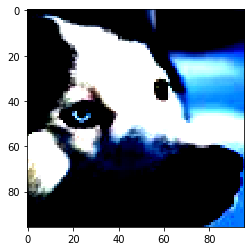

In [11]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0) )

In [13]:
out = inception(batch)
out

tensor([[ 1.1379e+00, -2.6305e-01,  2.7209e+00,  9.7421e+00,  3.4698e+00,
          1.7567e+00, -2.5467e+00, -2.2884e+00, -1.7525e+00, -1.5095e+00,
         -3.3958e-02, -2.0640e+00,  1.0942e+00, -2.8557e+00,  1.1889e+00,
         -1.0240e+00, -1.0961e+00,  5.4672e+00, -2.6169e+00, -9.4269e-01,
         -5.3392e+00, -3.1296e+00,  2.0158e+00, -5.7439e+00,  1.4581e+00,
         -6.3428e-01, -2.5021e+00, -3.7202e+00,  1.6098e+00,  8.7441e+00,
          1.4395e+00,  8.1009e-01,  3.6603e-01, -6.0806e-01, -1.4153e+00,
          1.5264e-01,  3.5696e+00, -8.8617e-02, -1.4882e+00, -5.0737e-02,
         -1.7627e+00,  5.3630e-01, -7.8083e-02,  3.4665e+00, -1.9995e-02,
         -2.3138e+00, -3.1951e+00, -3.9919e-01,  2.5380e+00,  5.8263e-01,
          3.7751e-01, -4.3859e-01, -1.4335e+00,  3.6661e+00, -5.6054e+00,
         -3.6434e+00, -2.8654e+00, -2.6835e+00,  6.0385e-01, -1.6653e+00,
         -3.0426e+00,  1.6710e+00,  9.4128e-01,  1.0487e+00,  1.7789e+00,
         -2.1384e+00, -3.5352e+00, -4.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [18]:
# Getting the max percentange of the out 
_, index = torch.max(out, 1)
# Findig the label for the max percentage getting
percentange = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentange[index[0]].item()


('Siberian husky', 93.61627960205078)